# Mask Detection Using CNN

sumber dataset: [kaggle.com](https://www.kaggle.com/prithwirajmitra/covid-face-mask-detection-dataset)

In [ ]:
import zipfile,os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpig
import pandas as pd
import pathlib
import random
import cv2
import tensorflow as tf
from google.colab import files
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import Dense, Activation, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
!pip install kaggle


In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"muahammadrionandod","key":"d0c9f1dfec82f6af90fcc9cc62f00bc5"}'}

In [ ]:
!kaggle datasets download -d ashishjangra27/face-mask-12k-images-dataset

401 - Unauthorized


In [ ]:
!unzip -q covid-face-mask-detection-dataset

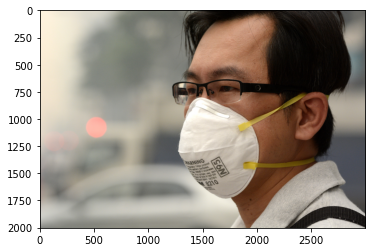

In [ ]:
img = image.load_img('/content/New Masks Dataset/Train/Mask/0003.jpg')
imgplot = plt.imshow(img)

In [ ]:
data=[]
labels=[]
without_mask=os.listdir("/content/New Masks Dataset/Train/Non Mask")
with_mask=os.listdir("/content/New Masks Dataset/Train/Mask")

In [ ]:
for a in without_mask:
  image = cv2.imread("/content/New Masks Dataset/Train/Non Mask/"+a,)
  image = cv2.resize(image, (224, 224))

  data.append(image)
  labels.append(0)

In [ ]:
for a in with_mask:
  image = cv2.imread("/content/New Masks Dataset/Train/Mask/"+a,)
  image = cv2.resize(image, (224, 224))

  data.append(image)
  labels.append(1)

In [ ]:
data = np.array(data) / 255.0
labels = np.array(labels)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42, shuffle=True, 
                                                    stratify=labels)

### Transfer Learning Using **ResNet152**

In [ ]:
base_model = tf.keras.applications.ResNet152(input_shape=[224,224,3], weights="imagenet", include_top=False)
for layer in base_model.layers:
  layer.trainable = False

234708992/234698864 [==============================] - 9s 0us/step


In [ ]:
model = Flatten()(base_model.output)
model = Dense(units=256, activation="relu")(model)
model = Dense(units=64, activation="relu")(model)
prediction_layer = Dense(units=1, activation="sigmoid")(model)

model = Model(inputs = base_model.input, outputs = prediction_layer)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [ ]:
hist = model.fit(X_train, y_train, epochs=20, batch_size=32)

Epoch 1/20
15/15 [==============================] - 319s 13s/step - loss: 2.3918 - accuracy: 0.5042
Epoch 2/20
15/15 [==============================] - 199s 13s/step - loss: 0.7773 - accuracy: 0.5938
Epoch 3/20
15/15 [==============================] - 199s 13s/step - loss: 0.5290 - accuracy: 0.7042
Epoch 4/20
15/15 [==============================] - 199s 13s/step - loss: 0.4857 - accuracy: 0.7500
Epoch 5/20
15/15 [==============================] - 199s 13s/step - loss: 0.4037 - accuracy: 0.8146
Epoch 6/20
15/15 [==============================] - 199s 13s/step - loss: 0.3380 - accuracy: 0.8417
Epoch 7/20
15/15 [==============================] - 199s 13s/step - loss: 0.3668 - accuracy: 0.8125
Epoch 8/20
15/15 [==============================] - 200s 13s/step - loss: 0.2828 - accuracy: 0.8813
Epoch 9/20
15/15 [==============================] - 199s 13s/step - loss: 0.2726 - accuracy: 0.8813
Epoch 10/20
15/15 [==============================] - 200s 13s/step - loss: 0.3294 - accuracy: 0.8479

In [ ]:
# PREDICTIONS
predictions = model.predict(X_test)
predict=[]

for i in range(len(predictions)):
  if(predictions[i][0]>0.5):
    predict.append(1)
  else:
    predict.append(0)

In [ ]:
pd.DataFrame(confusion_matrix(y_test, predict), columns = ["Without mask", "With mask"], index = ["Without mask", "With mask"])

,Without mask,With mask
Without mask,49,11
With mask,11,49


In [ ]:
model.save("mask_detector.h5", save_format="h5")

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
